<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий на hh.ru
   

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [9]:
# чтение данных
hh_table_origin=pd.read_csv('dst-3.0_16_1_hh_database.csv', sep=';')  
hh_table = hh_table_origin.copy()
# вывод размерности таблицы
print(hh_table.shape)  

(44744, 12)


2. Выведите несколько первых (последних строк таблицы), чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [10]:
# вывод первых 5 строк таблицы
print(hh_table.head()) 
# вывод последних 5 строк таблицы
print(hh_table.tail()) 

                                   Пол, возраст           ЗП  \
0    Мужчина ,  39 лет , родился 27 ноября 1979   29000 руб.   
1     Мужчина ,  60 лет , родился 20 марта 1959   40000 руб.   
2  Женщина ,  36 лет , родилась 12 августа 1982   20000 руб.   
3      Мужчина ,  38 лет , родился 25 июня 1980  100000 руб.   
4     Женщина ,  26 лет , родилась 3 марта 1993  140000 руб.   

                           Ищет работу на должность:  \
0                            Системный администратор   
1                               Технический писатель   
2                                           Оператор   
3  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4                  Региональный менеджер по продажам   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев , не готов к переезду , готов к редким...   
2  Тверь , не готова к переезду , не готова к ком...   
3  Саратов , не готов к переезду , готов к редким...  

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице

4. Обратите внимание на информацию о числе непустых значений

In [11]:
# вывод информации о числе непустых значений в столбцах
print(hh_table.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.


In [12]:
# вывод статистической информации о столбцах
hh_table.describe()  

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [13]:
def get_education(long_education):
    """ функция преобразования строки "Образование и ВУЗ" в строку "Образование"
    Для выполнения функции производится приведение всех букв строки "Образование и ВУЗ"к нижнему регистру и 
    разделение строки "Образование и ВУЗ" на слова по пробелу.   если первое слово в строке "Образование и ВУЗ" - 'высшее'или 
    'среднее', то это результат работы программы, если сочетание слов 'среднее специальное' или 'неоконченное высшее', 
    то это результат работы программы"""
    
    long_education = long_education.lower()   
    long_education_list = long_education.split(' ')     
    edu = long_education_list[0]   
     
    edu_long = long_education_list[1] 
    if edu == 'высшее':
        return edu      # 
    if edu == 'среднее':
        if edu_long=='специальное':
            return edu + ' ' + edu_long  
        else:
            return edu  
    if edu=='неоконченное' and edu_long == 'высшее':  
        return edu + ' ' + edu_long    
    return np.NaN

# преобразование строк 'Образование и ВУЗ' и запись их в новый столбец 'Образование'               
hh_table['Образование'] = hh_table['Образование и ВУЗ'].apply(get_education) 
# приведение элементов столбца 'Образование' к типу category    
hh_table['Образование'] = hh_table['Образование'].astype('category')   
# удаление столбца "Образование и ВУЗ"   
hh_table = hh_table.drop(['Образование и ВУЗ'], axis = 1)  
# вывод значения числа соискателей со средним образованием 
print(hh_table[hh_table['Образование'] == 'среднее'].shape[0]) 
# вывод уникальных значений столбца "Образование"   
print(hh_table['Образование'].unique())
    

559
['неоконченное высшее', 'высшее', 'среднее специальное', 'среднее']
Categories (4, object): ['высшее', 'неоконченное высшее', 'среднее', 'среднее специальное']


2. Теперь нас интересует столбец **"Пол/возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [14]:

def get_gender(long_gender):
    """ функция преобразования строки "Пол и возраст" в строку "Пол" """
    if 'Мужчина' in long_gender:
    
        return 'М'
    else:
        return 'Ж'
       

def get_age(long_age):
    """ функция преобразования строки "Пол и возраст" в строку "возраст"
    Для выполнения функции производится разделение строки "Пол и возраст" на слова по пробелу.
    Функция возвращает третье слово как возраст 
    """
    
    long_age_list = long_age.split(' ')   
        
    return long_age_list[3]       


# преобразование строк 'Пол и возраст' и запись их в новый столбец 'Пол'
hh_table['Пол'] = hh_table['Пол, возраст'].apply(get_gender)
# преобразование строк 'Пол и возраст' и запись их в новый столбец 'возраст'    
hh_table['Возраст'] = hh_table['Пол, возраст'].apply(get_age) 
    
hh_table['Возраст'] = hh_table['Возраст'].astype('int') 
# удаление столбца "Пол, возраст"
hh_table = hh_table.drop(['Пол, возраст'], axis = 1)   
# расчет процентного соотношения полов
print(hh_table['Пол'].value_counts(normalize=True).round(4)) 
# расчет среднего возраста
print(hh_table['Возраст'].mean())                   

М    0.8093
Ж    0.1907
Name: Пол, dtype: float64
32.19674146254246


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-третьих, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [15]:
def get_experience(arg):
    """Функция принимает на вход опыт работы в годах и месяцах и возвращает значение в месяцах
    Для выполненият функции производится разбиение строки описывающей опыт работы, разделитель - пробел.
    Затем составляется список возможного описания количества лет и количества месяцев. 
    Выделяется только часть текста, которая может содержать опыт работы,  проверяется, что на входе не нулевая строка.
    Затем проверяется, содержит текст и значения в годах и в месяцах, опыт работы в годах переводится в месяцы и 
    опыт работы, изначально выданный вгодах, и месяцах складывается.
    Если в строке представлены только года, то опыт работы в годах переводится в месяцы"""
    rez = arg
    if rez is not np.NaN:
        spis_year = ['лет', 'год', 'года']           
        spis_month = ['месяц', 'месяца', 'месяцев'] 
        arg_list_origin = arg.split(' ')             
        arg_list = arg_list_origin[2:6]              
        if len(arg_list) > 0:                        
            if arg_list[3] in spis_month:            
        
                arg_year = int(arg_list[0])*12       
                arg_month = int(arg_list[2])         
                rez = arg_year + arg_month 
            else:
                if arg_list[1] in spis_year:         
                    rez = int(arg_list[0])*12        
                else:
                    rez = int(arg_list[0])           
    if type(rez)!= int:                              # проверка, если в строке нет информации, или она ложная, то ответ NaN
        rez = np.NaN
    return rez

# преобразование строк 'Опыт работы' и запись их в новый столбец 'Опыт работы (месяц)'
hh_table['Опыт работы (месяц)'] = hh_table['Опыт работы'].apply(get_experience)
print(hh_table[hh_table['Опыт работы']=='Не указано'].shape[0]) 
# удаление столбца "Опыт работы"    
hh_table = hh_table.drop(['Опыт работы'], axis = 1)
# расчет медианного значения опыта работы всех соискателей   
print(hh_table['Опыт работы (месяц)'].median())     
  
        

2
100.0


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов миллионников:
    
   <code> million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    
    
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [16]:
def get_city(arg):
    """Функция принимает на вход данные о городе проживания и готовности к переездам и командировкам
    и возвращает название города проживания"""
    arg_list_origin = arg.split(' ')        # разбивается строка описывающая данные о городе проживания и готовности к переездам 
                                            # и командировкам, разделитель - пробел
    return arg_list_origin[0]               # выделяется только часть текста, которая может содержать данные о городе проживания 

def vspom(arg_list_origin):
    """Вспомогательная функция, которая определяет наличие слова НЕ в заданном фрагменте текста """
    
    list_rem = ['готов', 'готова', 'хочу']
    for i in range(1, len(arg_list_origin)):
        if arg_list_origin[i] in list_rem:    # поиск первого слова в фрагменте текста из списка list_rem
            
            if arg_list_origin[i-1]=='не':    # если перед найденным словом стоит слово НЕ, возвращает False
                return False
            else:
                return True
    return np.NaN
    
def get_removal(arg):
    """Функция принимает на вход данные о городе проживания и готовности к переездам и командировкам
    и возвращает название города проживания"""
    
    arg_list_origin = arg.split(' ')             # разбивается строка описывающая данные о городе проживания и готовности к переездам 
                                                 #и командировкам, разделитель - пробел
    return vspom(arg_list_origin)

def get_trip(str_long):
    """Функция принимает на вход данные о городе проживания и готовности к переездам и командировкам
    и возвращает название города проживания"""
    
    str_list_origin = str_long.split(' ')             # разбивается строка описывающая данные о городе проживания и готовности к переездам 
                                                      # и командировкам, разделитель - пробел
    str_list= str_list_origin[-5:]                    # выделение фрагмента текста, где может быть информация о командировках
    return vspom(str_list)
    
# преобразование строк 'Город, переезд, командировки' и запись в новый столбец данных о городе проживания
hh_table['Город'] = hh_table['Город, переезд, командировки'].apply(get_city) 
# преобразование строк 'Город, переезд, командировки' и запись в новый столбец данных о готовности к переезду    
hh_table['Готовность к переезду'] = hh_table['Город, переезд, командировки'].apply(get_removal)
# преобразование строк 'Город, переезд, командировки' и запись в новый столбец данных о готовности к командировкам    
hh_table['Готовность к командировкам'] = hh_table['Город, переезд, командировки'].apply(get_trip)
    

million_cities = ['Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань',
                  'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград']
# удаление столбца "Город, переезд, командировки"
hh_table = hh_table.drop(['Город, переезд, командировки'], axis = 1) 
# замена названий городов, не относящихся к миллионникам на ДРУГИЕ  
hh_table['Город'] = hh_table['Город'].apply(lambda x: x if x in million_cities else 'другие')   
# расчет процентного соотношения городов проживания    
print(hh_table['Город'].value_counts(normalize=True)['Санкт-Петербург']*100) 
# расчет процентного значения кандидатов, готовых и к переезду и к командировкам
print( hh_table[hh_table['Готовность к командировкам'] & hh_table['Готовность к переезду']].shape[0]/hh_table.shape[0]*100) 
    

11.033881637761487
31.876899696048632


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [17]:
# создание признаков - мигалок для категорий, входящих в столбцы Занятость и График
hh_table['Полная занятость'] = hh_table['Занятость'].apply(lambda x: True if 'полная занятость' in x else False)
hh_table['Частичная занятость'] = hh_table['Занятость'].apply(lambda x: True if 'частичная занятость' in x else False)
hh_table['Проектная работа'] = hh_table['Занятость'].apply(lambda x: True if 'проектная работа' in x else False)
hh_table['Волонтерство'] = hh_table['Занятость'].apply(lambda x: True if 'волонтерство' in x else False)
hh_table['Стажировка'] = hh_table['Занятость'].apply(lambda x: True if 'стажировка' in x else False)

hh_table['Полный день'] = hh_table['График'].apply(lambda x: True if 'полный день' in x else False)
hh_table['Сменный график'] = hh_table['График'].apply(lambda x: True if 'сменный график' in x else False)
hh_table['Гибкий график'] = hh_table['График'].apply(lambda x: True if 'гибкий график' in x else False)
hh_table['Удаленная работа'] = hh_table['График'].apply(lambda x: True if 'удаленная работа' in x else False)
hh_table['Вахтовый метод'] = hh_table['График'].apply(lambda x: True if 'вахтовый метод' in x else False)
# удаление столбца "Занятость"
hh_table = hh_table.drop(['Занятость'], axis = 1) 
# удаление столбца "График"  
hh_table = hh_table.drop(['График'], axis = 1)   
# расчет количества людей, которые ищут проектную работу или волонтерство
print( hh_table[hh_table['Проектная работа'] & hh_table['Волонтерство']].shape[0])  
# расчет количества людей, которые хотят работать вахтовым методом или с гибким графиком   
print( hh_table[hh_table['Гибкий график'] & hh_table['Вахтовый метод']].shape[0])   
    


436
2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [19]:
# чтение данных о курсе валют
currency_exchange = pd.read_csv('ExchangeRates.csv')  
# перевод данных в столбце 'Обновление резюме' в формат datetime
hh_table['date_'] = pd.to_datetime(hh_table['Обновление резюме'])
# выделение даты 
hh_table['date'] = hh_table['date_'].dt.date
# удаление столбцов Обновление резюме, вспомогательного а также лишних столбцов из таблицы курса валют
hh_table = hh_table.drop(['Обновление резюме'], axis = 1)
hh_table = hh_table.drop(['date_'], axis = 1)
currency_exchange = currency_exchange.drop(['per'], axis = 1)
currency_exchange = currency_exchange.drop(['time'], axis = 1)
currency_exchange = currency_exchange.drop(['vol'], axis = 1)

In [20]:

currency_exchange['date'] = pd.to_datetime(currency_exchange['date'])

def get_zp(arg):
    """ Функция выделения желаемой заработной платы"""    
    arg_list_origin = arg.split(' ')
    return int(arg_list_origin[0])

def get_cur(arg):
    """ Функция преобразования валюты к формату ISO""" 
    arg_list_origin = arg.split(' ')
    rez = arg_list_origin[1]
    if rez == 'бел.руб.':
        rez = 'BYN'
    if rez == 'грн.':
        rez = 'UAN'
    if rez == 'сум':
        rez = 'UZS'
    return rez

# Создание столбца желаемой заработной платы   
hh_table['zp'] = hh_table['ЗП'].apply(get_zp)
# Создание столбца наименований валют
hh_table['currency'] = hh_table['ЗП'].apply(get_cur)

# Узаление столбца ЗП
hh_table = hh_table.drop(['ЗП'], axis = 1)
hh_table['date'] = pd.to_datetime(hh_table['date'])

# Объединение таблиц
hh_table = hh_table.join(currency_exchange.set_index(['date', 'currency']), on = ['date', 'currency'], how = 'left')
# Заполнение пропусков в столбцах close и proportion единицами
values = {'close': 1 , 'proportion': 1}
hh_table = hh_table.fillna(values)
# Расчет значений желаемой заработной платы в рублях
hh_table['ЗП(руб)'] = hh_table['zp']*(hh_table['close']/hh_table['proportion'])
# Расчет медианного значения желаемой заработной платы в рублях
print(hh_table['ЗП(руб)'].median())

print(hh_table.shape)


58355.729999999996
(44744, 27)


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

0    30
dtype: int64


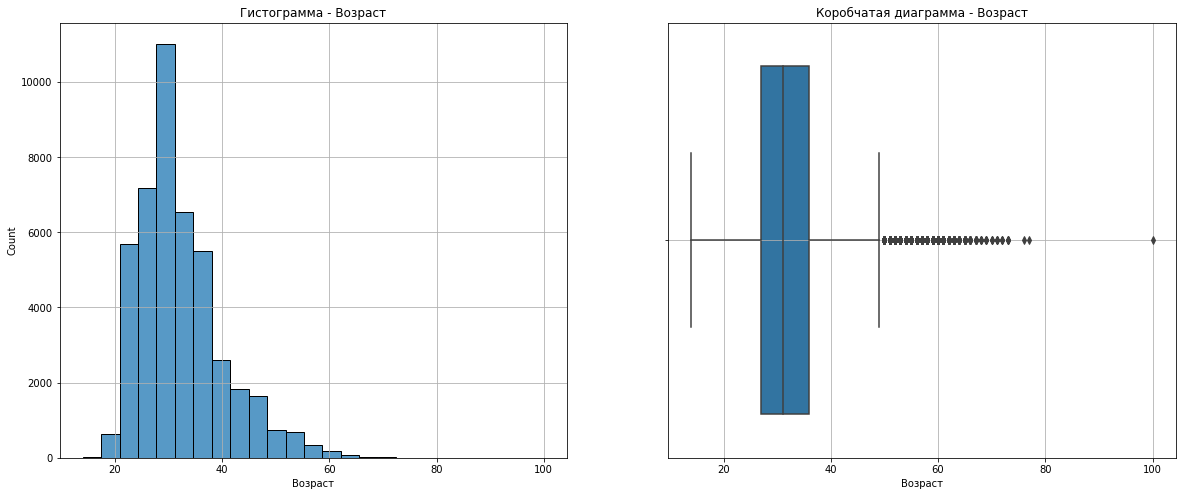

In [21]:
print(hh_table['Возраст'].mode())
# Построение гистограммы и коробчатой диаграммы для анализа данных о возрасте соискателей
fig,axes = plt.subplots(nrows=1, ncols=2, figsize = (20,8))
sns.histplot(data=hh_table, x='Возраст',bins = 25, ax=axes[0])
sns.boxplot(data = hh_table, x='Возраст',ax=axes[1])
axes[0].set_title('Гистограмма - Возраст')
axes[1].set_title('Коробчатая диаграмма - Возраст')
axes[0].grid()
axes[1].grid()

In [14]:
"""Выводы по графику:
Мода распределения равна 30, Предельные значения признака от примерно 8 до 100, большинство соискателей имеет возраст от 25 до 35 лет.
Согласно гистограмме закон распределения возраста не является нормальным, поэтому коробчатая диаграмма имеет множество отметок
за пределами усов. Эти отметки нельзя считать выбросами, необходимо провести дополнительное исследование.
Однозначно можно сказать, анализируя этот график, что наблюдается как минимум один выброс: один соискатель имеет возраст 100 лет, 
что вряд ли возможно
"""

'Выводы по графику:\nМода распределения равна 30, Предельные значения признака от примерно 8 до 100, большинство соискателей имеет возраст от 25 до 35 лет.\nСогласно гистограмме закон распределения возраста не является нормальным, поэтому коробчатая диаграмма имеет множество отметок\nза пределами усов. Эти отметки нельзя считать выбросами, необходимо провести дополнительное исследование.\nОднозначно можно сказать, анализируя этот график, что наблюдается как минимум один выброс: один соискатель имеет возраст 100 лет, \nчто вряд ли возможно\n'

ваши выводы по графику здесь

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

1188.0
0    81.0
dtype: float64


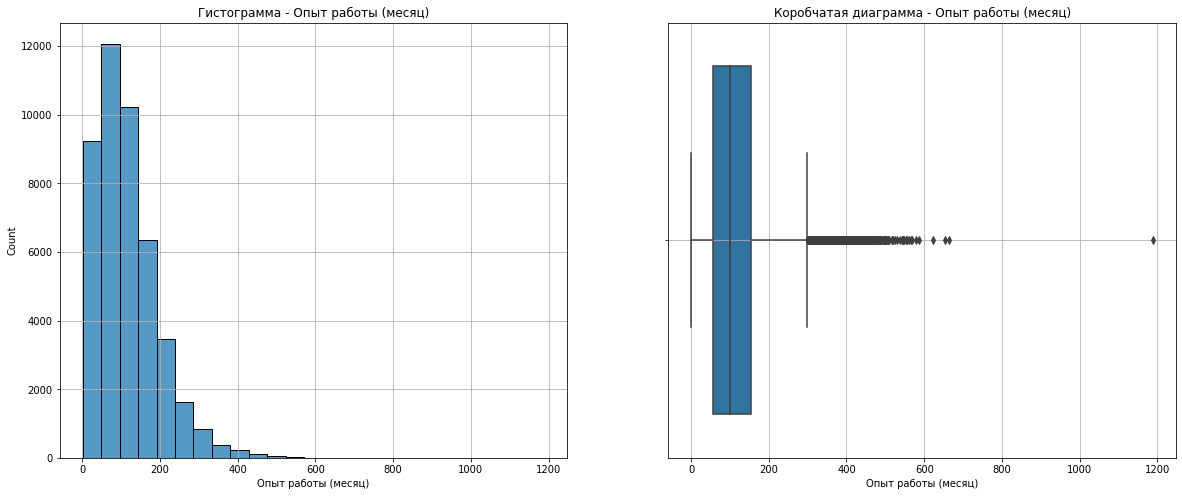

In [22]:
# расчет max значения опыта работы всех соискателей
print(hh_table['Опыт работы (месяц)'].max()) 
# расчет моды распределения значения опыта работы всех соискателей    
print(hh_table['Опыт работы (месяц)'].mode())  
# Построение гистограммы и коробчатой диаграммы для анализа данных об опыте работы соискателей  
fig,axes = plt.subplots(nrows=1, ncols=2, figsize = (20,8))
sns.histplot(data=hh_table, x='Опыт работы (месяц)',bins = 25, ax=axes[0])
sns.boxplot(data = hh_table, x='Опыт работы (месяц)')
axes[0].set_title('Гистограмма - Опыт работы (месяц)')
axes[1].set_title('Коробчатая диаграмма - Опыт работы (месяц)')
axes[0].grid()
axes[1].grid()

In [16]:
    """Выводы по графику:
    Мода распределения равна 81, Предельные значения признака от 0 до 1200, большинство соискателей имеют опыт работы от 50 
    до 150 месяцев. 
    Согласно гистограмме закон распределения опыта работы не является нормальным, поэтому коробчатая диаграмма имеет множество отметок
    за пределами усов. Эти отметки нельзя считать выбросами, необходимо провести дополнительное исследование.
    Наблюдается как минимум один выброс - 1200 месяцев опыт работы, т.е. 100 лет, чего быть не может
    """

'Выводы по графику:\nМода распределения равна 81, Предельные значения признака от 0 до 1200, большинство соискателей имеют опыт работы от 50 \nдо 150 месяцев. \nСогласно гистограмме закон распределения опыта работы не является нормальным, поэтому коробчатая диаграмма имеет множество отметок\nза пределами усов. Эти отметки нельзя считать выбросами, необходимо провести дополнительное исследование.\nНаблюдается как минимум один выброс - 1200 месяцев опыт работы, т.е. 100 лет, чего быть не может\n'

ваши выводы здесь

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


5
0    50000.0
dtype: float64


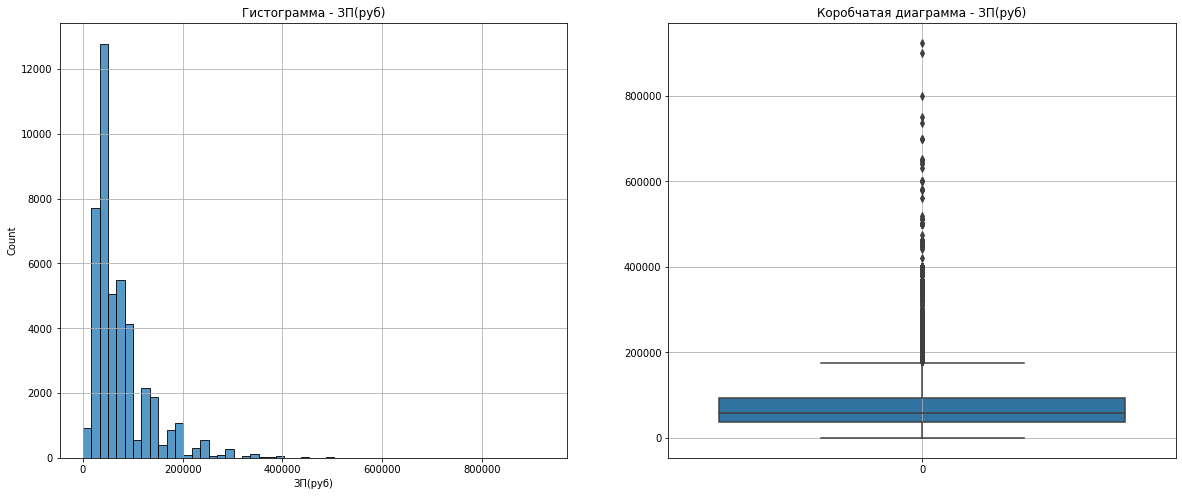

In [23]:
print(hh_table[hh_table['ЗП(руб)']>1000000].shape[0])
# расчет моды распределения значения ЗП(руб) всех соискателей
print(hh_table['ЗП(руб)'].mode())   
# выделение данных только о желаемой ЗП соискателей не превышающей миллиона 
zp = hh_table[hh_table['ЗП(руб)']<1000000]['ЗП(руб)']
# Построение гистограммы и коробчатой диаграммы для анализа данных о желаемой зароботной плате соискателей  
fig,axes = plt.subplots(nrows=1, ncols=2, figsize = (20,8))
sns.histplot(data=zp,bins = 55, ax=axes[0])
sns.boxplot(data = zp)
axes[0].set_title('Гистограмма - ЗП(руб)')
axes[1].set_title('Коробчатая диаграмма - ЗП(руб)')
axes[0].grid()
axes[1].grid()

ваши выводы здесь

In [18]:
 """Выводы по графикам:
 Мода распределения равна 50000, Предельные значения признака от 0 до 25000000, большинство соискателей хотят получать зарплату до
 до 180000 руб. Наблюдаются пять выбросов, когда желаемая зарплата больше миллиона
"""

'Выводы по графикам:\nМода распределения равна 50000, Предельные значения признака от 0 до 25000000, большинство соискателей хотят получать зарплату до\nдо 180000 руб. Наблюдаются пять выбросов, когда желаемая зарплата больше миллиона\n'

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

/home/nataly/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0, 0.5, 'Желаемая зароботная плата')

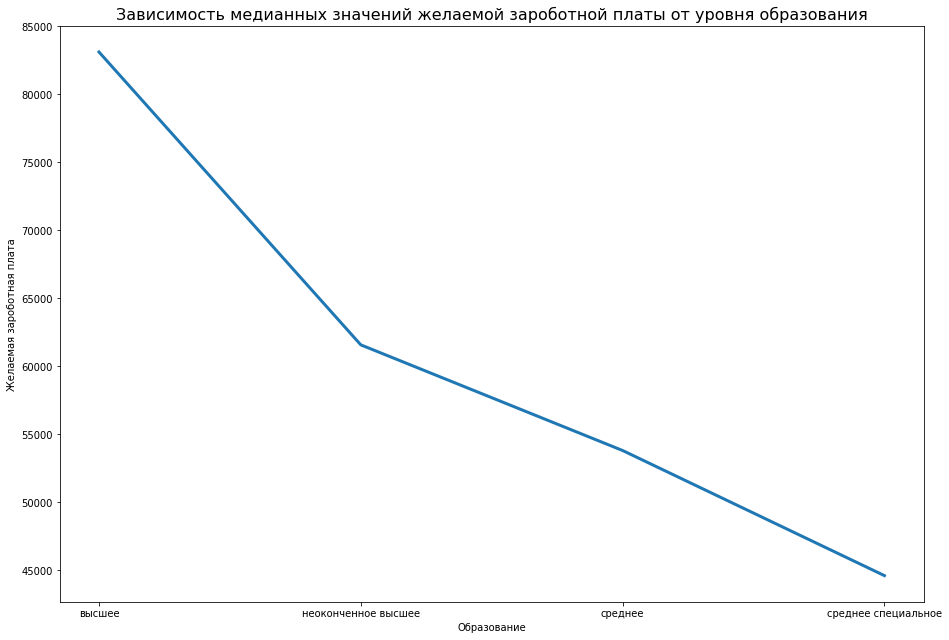

In [24]:
hh_total_n = hh_table[hh_table['ЗП(руб)']<1000000].groupby(by='Образование')['ЗП(руб)'].mean()
# Построение графика зависимости значений желаемой зароботной платы от уровня образования
fig = plt.figure(figsize=(12,8))
axes = fig.add_axes([0,0,1,1])
axes.plot(hh_total_n, lw=3)
axes.set_title('Зависимость медианных значений желаемой зароботной платы от уровня образования', fontsize = 16)
axes.set_xlabel('Образование')
axes.set_ylabel('Желаемая зароботная плата')


In [20]:
"""Выводы по графику: Величина желаемой заработной платы почти прямо пропорциональна зависит от уровня образования.
Наименьший уровень желаемой заработной платы соответствует среднему специальному образованию, наибольший - высшему. 
Уровень образования является важным признаком при прогнозировании заработной платы """

'Выводы по графику: Величина желаемой заработной платы почти прямо пропорциональна зависит от уровня образования.\nНаименьший уровень желаемой заработной платы соответствует среднему специальному образованию, наибольший - высшему. \nУровень образования является важным признаком при прогнозировании заработной платы '

ваши выводы здесь

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

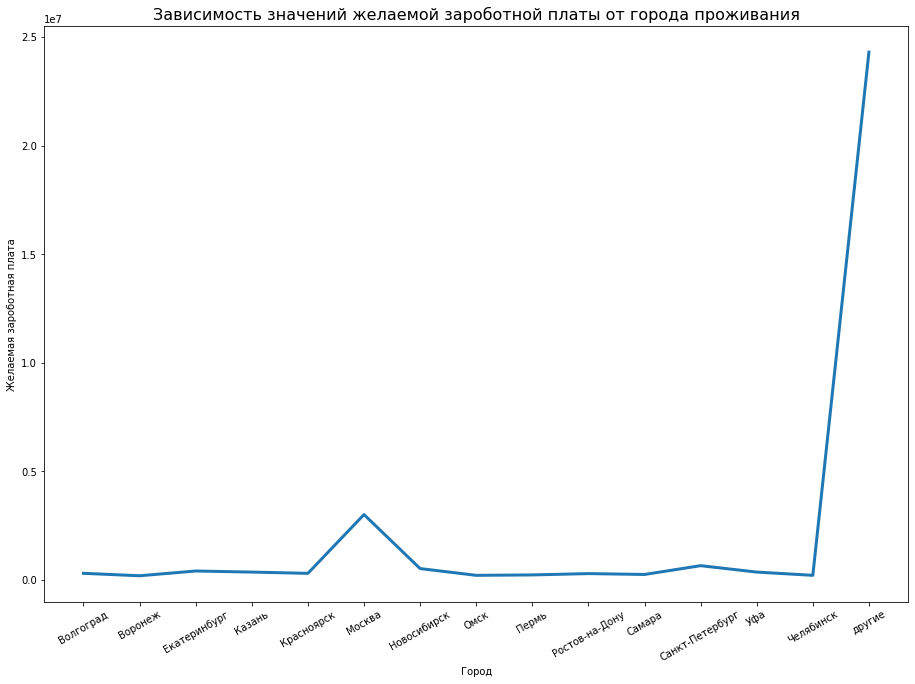

In [25]:
hh_total_m = hh_table.groupby(by='Город')['ЗП(руб)'].max()
# Построение графика зависимости значений желаемой зароботной платы от города проживания
fig = plt.figure(figsize=(12,8))
axes = fig.add_axes([0,0,1,1])
axes.plot(hh_total_m, lw=3)
axes.set_title('Зависимость значений желаемой зароботной платы от города проживания', fontsize = 16)
axes.set_xlabel('Город')
axes.set_ylabel('Желаемая зароботная плата')
axes.xaxis.set_tick_params(rotation=30)

ваши выводы здесь

In [22]:
"""Выводы по графику: На графике наблюдается заметный максимум для значений желаемой заработной платы для города Москва,
и меньший максимум для Санкт-Петербурга, но наибольшие значения этой величины относятся к малым городам, не входящим в 
список городов-миллионников. 
Для городов миллионников, кроме Москвы и Санкт-Петербурга) величина заработной платы примерно одинакова."""

'Выводы по графику: На графике наблюдается заметный максимум для значений желаемой заработной платы для города Москва,\nи меньший максимум для Санкт-Петербурга, но наибольшие значения этой величины относятся к малым городам, не входящим в \nсписок городов-миллионников. \nДля городов миллионников, кроме Москвы и Санкт-Петербурга) величина заработной платы примерно одинакова.'

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

65349.8


<AxesSubplot:xlabel='истина/ложь'>

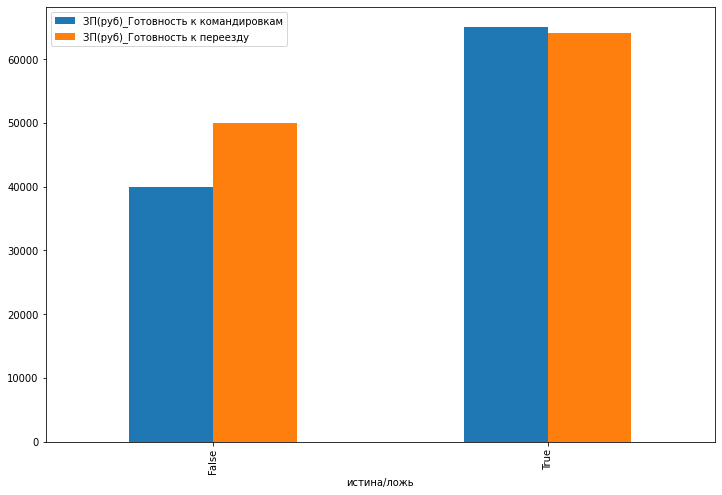

In [26]:
# Расчет медианного желаемой заработной платы в зависимости от параметров Готовность к переезду и Готовность к командировкам
# и запись их в таблицы istrip и isremoval
print(hh_table[hh_table['Готовность к переезду'] & hh_table['Готовность к командировкам']]['ЗП(руб)'].median())

istrip = hh_table.groupby(by = 'Готовность к командировкам', as_index = False)['ЗП(руб)'].median() 
isremoval = hh_table.groupby(by = 'Готовность к переезду', as_index = False)['ЗП(руб)'].median()
# Объединение таблиц istrip и isremoval
is_total=istrip.join(isremoval, rsuffix = '_right', how = 'outer')
is_total.rename(columns={'ЗП(руб)':'ЗП(руб)_Готовность к командировкам', 
                        'ЗП(руб)_right':'ЗП(руб)_Готовность к переезду',
                        'Готовность к переезду':'истина/ложь'}, inplace = True)

# Построение многоуровневой столбчатой диаграммы
is_total.plot(x= 'истина/ложь', y = ['ЗП(руб)_Готовность к командировкам', 'ЗП(руб)_Готовность к переезду'] , kind = 'bar',
              figsize=(12,8))



In [24]:
"""Выводы по графику:
Медианные значения желаемой заработной платы соискателей готовых к переездам и к командировкам примерно одинаковы и составляют 
примерно 67000 руб. Желаемые заработные платы соискателей, не готовых к командировкам и переездам ниже. При этом соискатели, 
неготовые к переезду хотят получать больше в среднем на 10000, чем неготовые к командировкам. Если соискатель не готов к командировкам,
он в среднем согласен на оплату в 40000 руб. в месяц

"""

'Выводы по графику:\nМедианные значения желаемой заработной платы соискателей готовых к переездам и к командировкам примерно одинаковы и составляют \nпримерно 67000 руб. Желаемые заработные платы соискателей, не готовых к командировкам и переездам ниже. При этом соискатели, \nнеготовые к переезду хотят получать больше в среднем на 10000, чем неготовые к командировкам. Если соискатель не готов к командировкам,\nон в среднем согласен на оплату в 40000 руб. в месяц\n\n'

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

Text(0.5, 1.0, 'Тепловая карта желаемой ЗП')

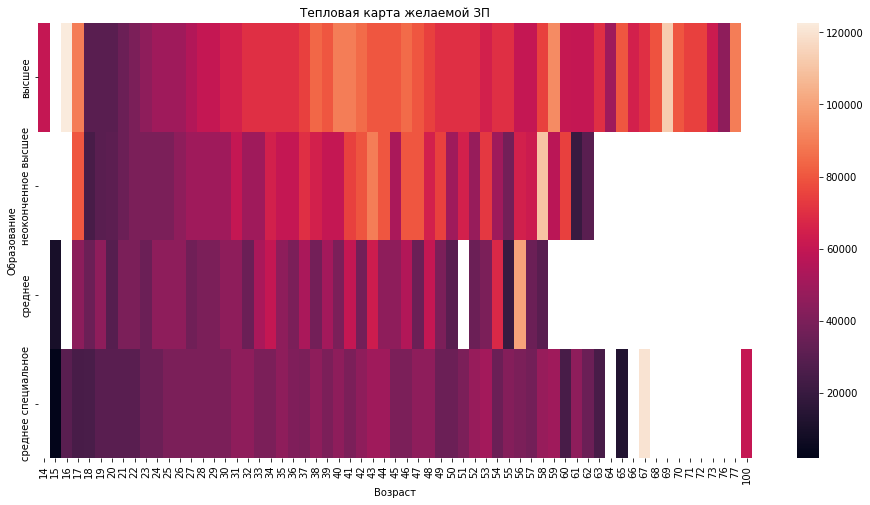

In [27]:
# Построение графика зависимости медианных значений желаемой зароботной платы от возраста и образования соискателя
pivot_v_o =hh_table.pivot_table(
    values = 'ЗП(руб)',
    columns = 'Возраст' ,
    index = 'Образование',
    aggfunc = 'median'
)
plt.figure(figsize=(16,8))
heatmap = sns.heatmap(data = pivot_v_o)
heatmap.set_title('Тепловая карта желаемой ЗП')

ваши выводы здесь

In [26]:
    """Выводы по графику: 
    Величина желаемой ЗП зависит от возраста и образования. 
    Наибольшие требования предЪявляют соискатели среднего возраста от 35 до 45 лет, имеющие неоконченное высшее и высшее образование.
    Для этих же категорий образования типичен наибольший диапазон изменений ЗП с изменением возраста.
    Менее притязательны соискатели со средним специальным образованием любого возраста
    """

'Выводы по графику: \nВеличина желаемой ЗП зависит от возраста и образования. \nНаибольшие требования предЪявляют соискатели среднего возраста от 35 до 45 лет, имеющие неоконченное высшее и высшее образование.\nДля этих же категорий образования типичен наибольший диапазон изменений ЗП с изменением возраста.\nМенее притязательны соискатели со средним специальным образованием любого возраста\n'

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

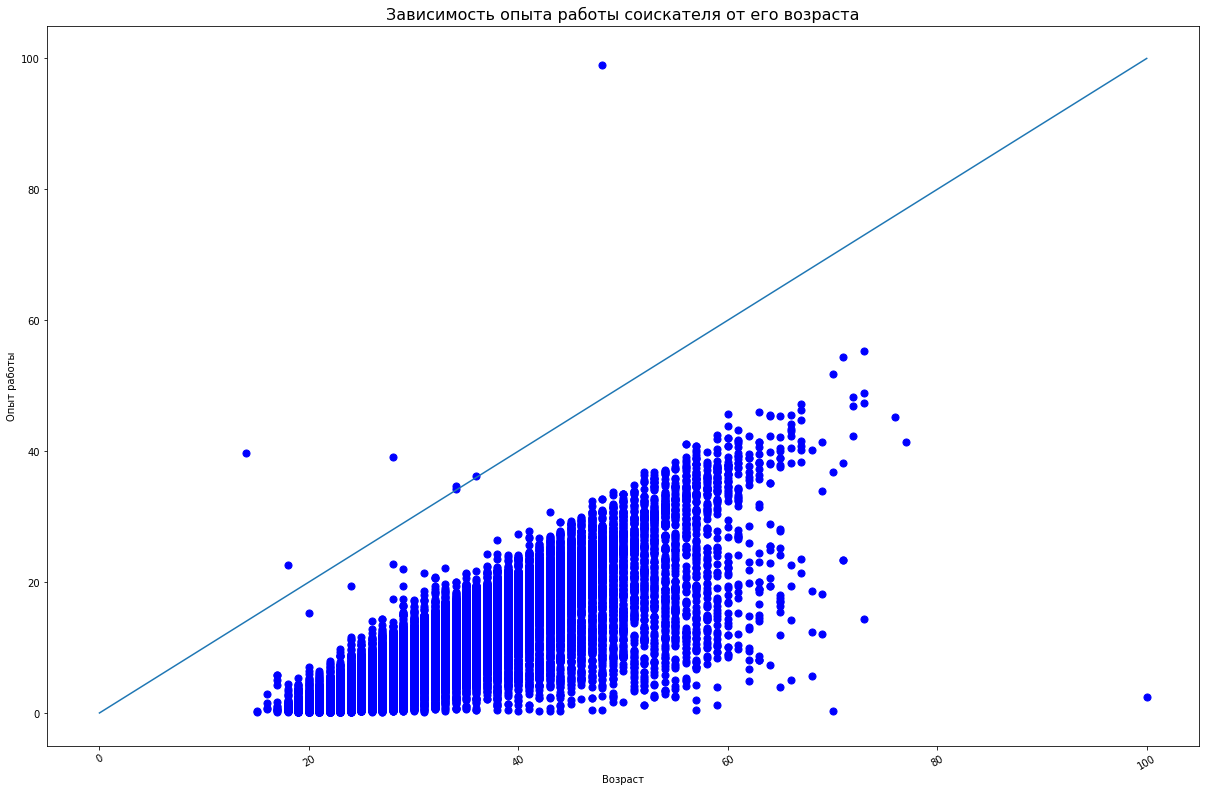

In [28]:
# Построение графика зависимости значений опыта работы от возраста 
linx = [0, 100]
lin = pd.DataFrame({'xx':linx})
lin.index = [0, 100]
dr_o_v = plt.figure(figsize = (16,10))
axes = dr_o_v.add_axes([0,0,1,1])
axes.scatter(#
    x = hh_table['Возраст'],
    y = hh_table['Опыт работы (месяц)']/12,
    s = 50,
    marker = 'o',
    c = 'blue'
)
axes.plot(lin)
axes.set_title('Зависимость опыта работы соискателя от его возраста', fontsize = 16)
axes.set_xlabel('Возраст')
axes.set_ylabel('Опыт работы')
axes.xaxis.set_tick_params(rotation=30)

In [28]:
    """Выводы по графику:
    Опыт работы прямопропорционально зависит от возраста для большинства соискателей. 
    На графике наблюдается четыре значения, соответствующих выбросам, когда опыт работы превышает возраст, если, конечно, соискатель
    не указал стаж работы, который для некоторых профессий рассчитывается, как год за два. Для подтверждения аномальности
    этих значений необходимо дополнительное исследование
    """['Возраст']

'Выводы по графику:\nОпыт работы прямопропорционально зависит от возраста для большинства соискателей. \nНа графике наблюдается четыре значения, соответствующих выбросам, когда опыт работы превышает возраст, если, конечно, соискатель\nне указал стаж работы, который для некоторых профессий рассчитывается, как год за два. Для подтверждения аномальности\nэтих значений необходимо дополнительное исследование\n'

ваши выводы здесь

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [29]:
# Построение графика зависимости желаемой заработной платы от города проживания соискателя и от его образования, 
# а также от пола соискателя
hh_total_n = hh_table[hh_table['ЗП(руб)']<1000000]


fig = px.scatter_3d(
  data_frame = hh_total_n , 
  x = 'Город', 
  y = 'Образование',
  z = 'ЗП(руб)', color = 'Пол',
  width = 1000, 
  height = 700
) 

fig.show()



ваши выводы здесь

In [ ]:
'''
Выводы по графику:
Несмотря на то, что женских резюме среди исходных данных гораздо меньше, чем мужских, на графике хорошо видно, 
что желаемая заработная плата женщин в среднем ниже, чем мужчин. 
Согласно ранее проведенным исследованиям, максимальная заработная плата жителей малых городов гораздо выше, чем в городах-
миллионниках. Однако, именно для этих городов в данных наблюдаются выбросы. На графике видно, что в среднем в этих городах
требования такие же, как в Санкт-Петербурге, за исключением категорий граждан со средним образованием, для которых желаемая
заработная плата близка к требованиям москвичей.
'''

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [30]:
# Поиск полных дубликатов
hh_table = hh_table.drop_duplicates(ignore_index = True)
print(hh_table.shape)

(44583, 27)


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [31]:
# Вывод информации о числе пропусков в столбцах
print(hh_table.info())
# число пропусков в столбце "Опыт работы (месяц)" включает те ячейки, в которых было написано "Не указано"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44583 entries, 0 to 44582
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Ищет работу на должность:        44583 non-null  object        
 1   Последнее/нынешнее место работы  44582 non-null  object        
 2   Последняя/нынешняя должность     44581 non-null  object        
 3   Авто                             44583 non-null  object        
 4   Образование                      44583 non-null  category      
 5   Пол                              44583 non-null  object        
 6   Возраст                          44583 non-null  int64         
 7   Опыт работы (месяц)              44415 non-null  float64       
 8   Город                            44583 non-null  object        
 9   Готовность к переезду            44583 non-null  bool          
 10  Готовность к командировкам       44512 non-null  object   

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [32]:

# Удаление строк с пропусками в столбцах Последнее/нынешнее место работы и Последняя/нынешняя должность
hh_table = hh_table.dropna(how = 'any', subset = ['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])
hh_table['Опыт работы (месяц)'] = hh_table['Опыт работы (месяц)'].fillna(hh_table['Опыт работы (месяц)'].median())
# Заполнение пропусков в столбце с опытом работы медианными значеними
print(round(hh_table['Опыт работы (месяц)'].mean(), 2))


114.36


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [33]:
# Подсчет числа выбросов в столбце со значениями желаемой заработной платы, когда она превышает миллион
outliers = hh_table[(hh_table['ЗП(руб)']>1000000)|(hh_table['ЗП(руб)']<1000)]
print(outliers.shape[0])
hh_table = hh_table.drop(outliers.index, axis = 0)

89


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [34]:
# Подсчет числа выбросов в столбце со значениями опыта работы, когда опыт работы превышает возраст
outliers = hh_table[(hh_table['Опыт работы (месяц)']/12 >hh_table['Возраст'])]
print(outliers.shape[0])
hh_table = hh_table.drop(outliers.index, axis = 0)

7


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**? В какую сторону **асимметрично логарифмическое распределение**? Найдите выбросы с помощью **метода z-отклонения** и удалите их из данных, используйте логарифмический масштаб, сделайте **послабление на 1 сигму (возьмите 4 сигмы)** в сторону, противоположную асимметрии. 

3


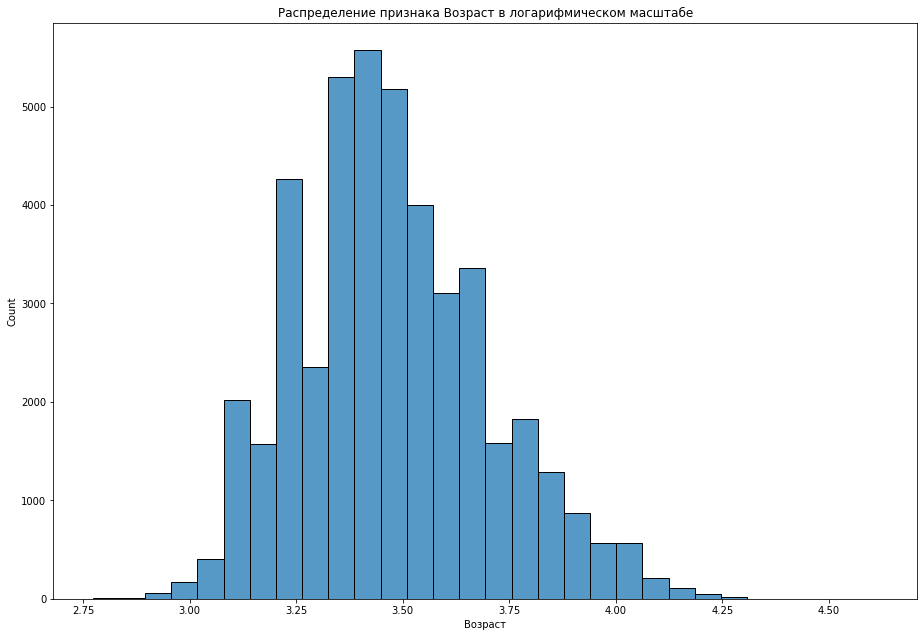

In [35]:
log_age = np.log(hh_table['Возраст']+1)

# Построение распределения признака Возраст в логарифмическом масштабе
fig = plt.figure(figsize=(12,8))
axes = fig.add_axes([0,0,1,1])
histplot = sns.histplot(log_age, bins = 30, ax=axes)
histplot.set_title('Распределение признака Возраст в логарифмическом масштабе')

# Поиск выбросов с помощью метода z-отклонения
mu = log_age.mean()
sigma = log_age.std()
lower_bound = mu - 3*sigma
upper_bound = mu + 4*sigma
outliers = hh_table[(log_age < lower_bound) | (log_age > upper_bound)]
cleaned = hh_table[(log_age > lower_bound) & (log_age < upper_bound)]

print(outliers.shape[0])

